In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.shape

(50000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.duplicated().sum()

719

In [7]:
df['booking_complete'].unique()

array([0, 1], dtype=int64)

In [8]:
# Assuming your data is in a DataFrame called 'df'
def create_feature_importance_plot(df):
    # Prepare the data
    # Create copy to avoid modifying original data
    df_encoded = df.copy()
    
    # Encode categorical variables
    le = LabelEncoder()
    categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
    
    for col in categorical_columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    
    # Prepare features and target
    X = df_encoded.drop('booking_complete', axis=1)
    y = df_encoded['booking_complete']
    
    # Train Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Get feature importances
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    })
    
    # Sort by importance
    importances = importances.sort_values('importance', ascending=True)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    
    # Create horizontal bar plot
    plt.barh(importances['feature'], importances['importance'], color='grey', alpha=0.8)
    
    # Customize the plot
    plt.xlabel('Relative Importance')
    plt.title('Feature Importances')
    plt.tight_layout()
    
    return plt


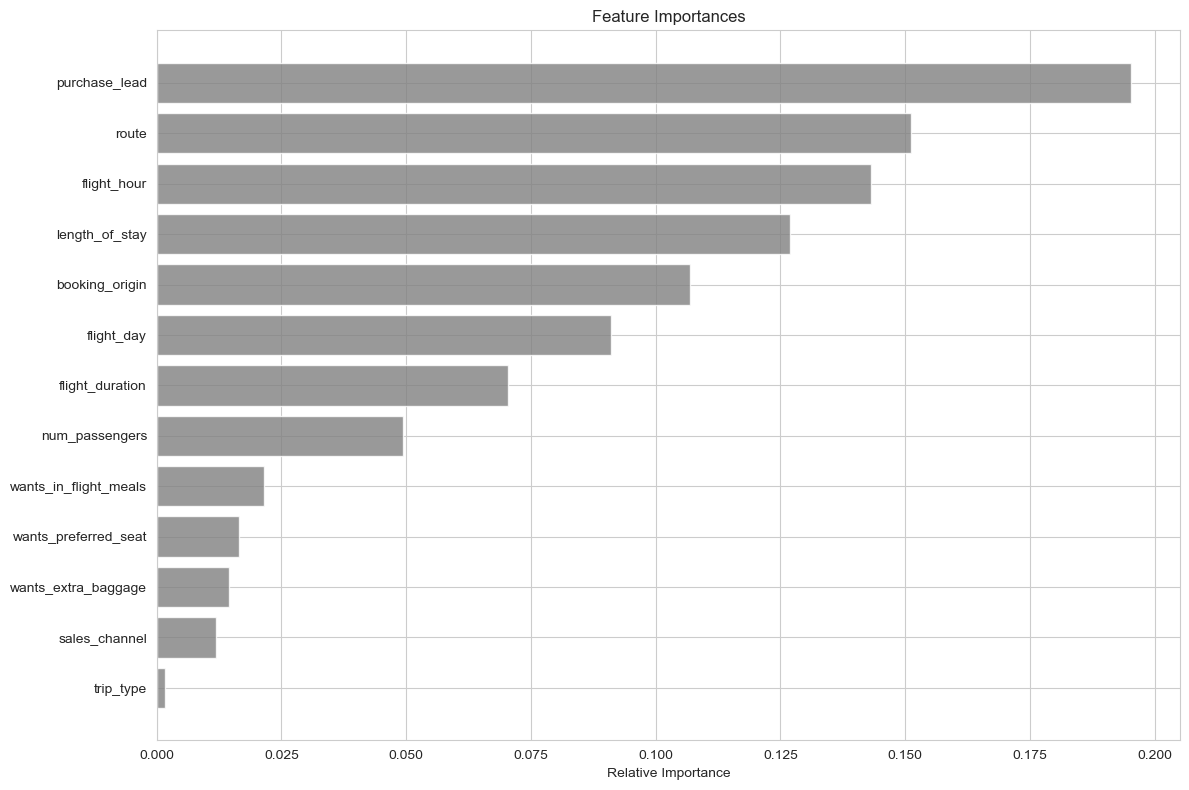

In [9]:
df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
plot = create_feature_importance_plot(df)
plot.show()

In [11]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [14]:
df_category = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage']

In [15]:
for category in df_category:
    print(f"Unique values in {category}: {df[category].unique()}")
    # Atau untuk menghitung jumlah nilai unik
    print(f"Number of unique values in {category}: {df[category].nunique()}")

Unique values in sales_channel: ['Internet' 'Mobile']
Number of unique values in sales_channel: 2
Unique values in trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
Number of unique values in trip_type: 3
Unique values in flight_day: ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
Number of unique values in flight_day: 7
Unique values in route: ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'B

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Label Encoding untuk variabel biner
le = LabelEncoder()
df['wants_extra_baggage'] = le.fit_transform(df['wants_extra_baggage'])

# One-Hot Encoding untuk variabel kategorikal lainnya
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [18]:
# Pisahkan features dan target
X = df[categorical_columns + ['wants_extra_baggage']]
y = df['booking_complete']  # Ganti dengan kolom target Anda

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Preprocessing dan Random Forest
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns[:-1]),
        ('label', 'passthrough', ['wants_extra_baggage'])
    ])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# Fit model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route']),
                                                 ('label', 'passthrough',
                                                  ['wants_extra_baggage'])])),
                ('classifier', RandomForestClassifier())])

In [19]:
# Prediksi
y_pred = rf_pipeline.predict(X_test)

# Skor akurasi
print("Akurasi:", rf_pipeline.score(X_test, y_test))

# Metrik tambahan
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.8355

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8490
           1       0.37      0.13      0.19      1510

    accuracy                           0.84     10000
   macro avg       0.62      0.55      0.55     10000
weighted avg       0.79      0.84      0.80     10000


Confusion Matrix:
[[8158  332]
 [1313  197]]
